 # Tests on PDA

In [1]:

#----TURN THESE ON IF RUNNING ON JOVE ON COLAB BY REMOVING THE ''' ... '''

'''
! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
import sys
sys.path.append('./Jove')
sys.path.append('./Jove/jove')
'''

#----TURN THESE ON IF RUNNING ON OWN INSTALLATION (default turned-on)

import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path

from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



Generating LALR tables


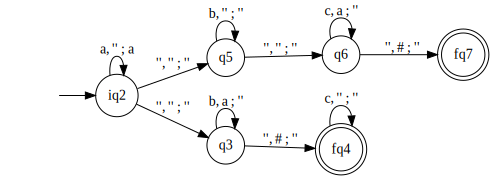

In [2]:
f27sip = md2mc('''
PDA 
!!---------------------------------------
!! This is a PDA From Sipser's book
!! This matches a's and b's ignoring c's
!! or matches a's and c's, ignoring b's 
!! in the middle. Thus, the language is
!! a^m b^m c^n or a^m b^n c^m
!!---------------------------------------

!!---------------------------------------------------------------------------
!! State: in , sin ; spush -> tostates !! comment
!!---------------------------------------------------------------------------
iq2    : a  , ''  ; a     -> iq2      !!  stack a's
iq2    : '' , ''  ; ''    -> q3,q5    !!  split non-det for a^m b^m c^n (q3)
                                      !!  or a^m b^n c^m (q5)
			     
q3     : b  , a   ; ''    -> q3       !!  match b's against a's
q3     : '' , #   ; ''    -> fq4      !!  hope for acceptance when # surfaces

fq4    : c  , ''  ; ''    -> fq4      !!  be happy so long as c's come
                                      !!  will choke and reject if anything
			              !!  other than c's come

q5     : b  , ''  ; ''    -> q5       !!  here, we are going to punt over b's
q5     : '' , ''  ; ''    -> q6       !!  and non-det decide to honor c's matching
                                      !!  against a's

q6     : c  , a   ; ''    -> q6       !!  OK to match so long as c's keep coming
q6     : '' , #   ; ''    -> fq7      !!  when # surfaces, be ready to accept in
                                      !!  state fq7. However, anything else coming in
			                          !!  now will foil match and cause rejection.
!!---------------------------------------------------------------------------
''')
DOf27sip = dotObj_pda(f27sip, FuseEdges=True)
DOf27sip

In [3]:
DOf27sip.source

'// PO_St1\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tq6 [label=q6 peripheries=1 shape=circle]\n\t\tq5 [label=q5 peripheries=1 shape=circle]\n\t\tq3 [label=q3 peripheries=1 shape=circle]\n\t\tiq2 [label=iq2 peripheries=1 shape=circle]\n\t\tfq4 [label=fq4 peripheries=2 shape=circle]\n\t\tfq7 [label=fq7 peripheries=2 shape=circle]\n\t\t\tEMPTY -> iq2\n\t\t\tiq2 -> iq2 [label="a, \'\' ; a"]\n\t\t\tiq2 -> q5 [label="\'\', \'\' ; \'\'"]\n\t\t\tiq2 -> q3 [label="\'\', \'\' ; \'\'"]\n\t\t\tq3 -> q3 [label="b, a ; \'\'"]\n\t\t\tq3 -> fq4 [label="\'\', # ; \'\'"]\n\t\t\tfq4 -> fq4 [label="c, \'\' ; \'\'"]\n\t\t\tq5 -> q5 [label="b, \'\' ; \'\'"]\n\t\t\tq5 -> q6 [label="\'\', \'\' ; \'\'"]\n\t\t\tq6 -> q6 [label="c, a ; \'\'"]\n\t\t\tq6 -> fq7 [label="\'\', # ; \'\'"]\n}'

In [4]:
explore_pda("aaabbbccc", f27sip)

*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String aaabbbccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('fq4', '', '')
Reached as follows:
->  ('iq2', 'aaabbbccc', '#')
->  ('iq2', 'aabbbccc', 'a#')
->  ('iq2', 'abbbccc', 'aa#')
->  ('iq2', 'bbbccc', 'aaa#')
->  ('q3', 'bbbccc', 'aaa#')
->  ('q3', 'bbccc', 'aa#')
->  ('q3', 'bccc', 'a#')
->  ('q3', 'ccc', '#')
->  ('fq4', 'ccc', '')
->  ('fq4', 'cc', '')
->  ('fq4', 'c', '')
->  ('fq4', '', '') .
Final state  ('fq7', '', '')
Reached as follows:
->  ('iq2', 'aaabbbccc', '#')
->  ('iq2', 'aabbbccc', 'a#')
->  ('iq2', 'abbbccc', 'aa#')
->  ('iq2', 'bbbccc', 'aaa#')
->  ('q5', 'bbbccc', 'aaa#')
->  ('q5', 'bbccc', 'aaa#')
->  ('q5', 'bccc', 'aaa#')
->  ('q5', 'ccc', 'aaa#')
->  ('q6', 'ccc', 'aaa#')
->  ('q6', 'cc', 'aa#')
->  ('q6', 'c', 'a#')
->  ('q6', '', '#')
->  ('fq7', '', '') .
